In [ ]:
!pip install qiskit ipywidgets pylatexenc python-resize-image qiskit[visualization]

In [ ]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state_city
from qiskit import execute, Aer, BasicAer, transpile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from resizeimage import resizeimage
import random
import frqi
import qiskit.quantum_info as qi
import math

In [ ]:
# Quantum Fourier Transform

def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation:
        circuit.cp(pi/2**(n-qubit), qubit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

In [ ]:
# Inverse Quantum Fourier Transform

def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [ ]:
anc = QuantumRegister(1, "anc")
img = QuantumRegister(11, "img")
anc2 = QuantumRegister(1, "anc2")
# anc3 = QuantumRegister(1, "anc3") 
c = ClassicalRegister(12)

qc = QuantumCircuit(anc, img, anc2, c)

imageNames = ["1.jpg", "2.jpg", "3.jpg"]
imageNum1 = 0
imageNum2 = 2

image1 = Image.open(imageNames[imageNum1]).convert('LA')
image2 = Image.open(imageNames[imageNum2]).convert('LA')

def image_normalization(image):
    image = resizeimage.resize_cover(image, [32, 32])
    w, h = 32, 32
    image = np.array([[image.getpixel((x,y))[0] for x in range(w)] for y in range(h)])

    # 2-dimensional data convert to 1-dimensional array
    image = image.flatten()
    # change type
    image = image.astype('float64')
    # Normalization(0~pi/2)
    image /= 255.0
    generated_image = np.arcsin(image)

    return generated_image

image1 = image_normalization(image1)
image2 = image_normalization(image2)


# apply hadamard gates
for i in range(1, len(img)):
    qc.h(img[i])

# encode ref image
for i in range(len(image1)):
        if image1[i] != 0:
                frqi.c10ry(qc, 2 * image1[i], format(i, '010b'), img[0], anc2[0], [img[j] for j in range(1,len(img))])





0000000000
0000000001
0000000010
0000000011
0000000100
0000000101
0000000110
0000000111
0000001000
0000001001
0000001010
0000001011
0000001100
0000001101
0000001110
0000001111
0000010000
0000010001
0000010010
0000010011
0000010100
0000010101
0000010110
0000010111
0000011000
0000011001
0000011010
0000011011
0000011100
0000011101
0000011110
0000011111
0000100000
0000100001
0000100010
0000100011
0000100100
0000100101
0000100110
0000100111
0000101000
0000101001
0000101010
0000101011
0000101100
0000101101
0000101110
0000101111
0000110000
0000110001
0000110010
0000110011
0000110100
0000110101
0000110110
0000110111
0000111000
0000111001
0000111010
0000111011
0000111100
0000111101
0000111110
0000111111
0001000000
0001000001
0001000010
0001000011
0001000100
0001000101
0001000110
0001000111
0001001000
0001001001
0001001010
0001001011
0001001100
0001001101
0001001110
0001001111
0001010000
0001010001
0001010010
0001010011
0001010100
0001010101
0001010110
0001010111
0001011000
0001011001
0001011010

In [ ]:
# TRANSFORMATION 1: Quantum Fourier Transform
qft(qc, len(img))

In [ ]:
# DECRYPTION FOR 1: Inverse Quantum Fourier Transform
qft_dagger(qc, len(img))

In [ ]:
# TRANSFORMATION 2: Rotation in Frequency Space

qft(qc, len(img))

# random.random() * 2 * math.pi
angle = 0.1
for i in range(len(img)):
  qc.rx(angle, i)

qft_dagger(qc, len(img))

In [ ]:
# TRANSFORMATION 3 : Randomized Angle on Each Qubit Transform (like an encryption algorithm)
angleArr = []
for i in range(len(img)):
  angle = random.random() * 2 * math.pi
  angleArr.append(angle)
  qc.rx(angle, i)

In [ ]:
# DECRYPTION FOR 3: Randomized Angle on Each Qubit Transform (like an encryption algorithm)

for i in range(len(img)):
  qc.rx(-angleArr[i], i)



In [ ]:
# TRANSFORMATION 4 : Uniform Random Rotation on all Qbits
angle = random.random() * 2 * math.pi
for i in range(len(img)):
  qc.rx(angle, i)

78880
{'011101110111': 1, '101011111110': 1, '010100110101': 1, '000100100111': 1, '101001101011': 1, '111101001010': 1, '100110100000': 1, '100011000001': 1, '000100101010': 1, '101011001101': 1, '001001110011': 1, '110110100111': 1, '000011100100': 1, '111011101010': 1, '100001011101': 2, '011111010001': 1, '001110100000': 1, '010111000111': 1, '111101010000': 1, '101101111111': 1, '101011100101': 1, '011000100000': 1, '000010101011': 1, '001100110011': 1, '011010100000': 1, '010010011111': 2, '110001001010': 1, '011111111101': 1, '010101111110': 1, '000101110001': 1, '111011111110': 1, '000001100111': 1, '110000001010': 1, '100100010110': 1, '100001010011': 2, '101010101011': 1, '110110111110': 1, '101110001111': 1, '001111101111': 1, '111110011110': 2, '000101001010': 1, '001000111111': 1, '011110110111': 1, '101101010011': 1, '000100011101': 1, '000111101000': 1, '001100011100': 1, '100101110010': 1, '000010010100': 1, '101011000011': 1, '101100111010': 2, '001000000111': 2, '1001

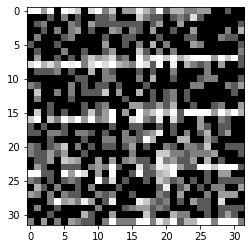

In [ ]:
# qed.quantum_edge_detection(qc)
qc.measure(anc, c[0])
# qc.measure(anc3, c[0])
qc.measure(img, c[1:12])
print(qc.depth())
numOfShots = 8192
result = execute(qc, Aer.get_backend('qasm_simulator'), shots=numOfShots, backend_options={"fusion_enable":True}).result()
#circuit_drawer(qc).show()
#plot_histogram(result.get_counts(qc))

print(result.get_counts(qc))

# generated image
genimg = np.array([])

#### decode
for i in range(len(image1)):
        try:
                genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'10']/numOfShots)])
        except KeyError:
                genimg = np.append(genimg,[0.0])

# inverse nomalization
genimg *= 32.0 * 255.0

# convert type
genimg = genimg.astype('int')

# back to 2-dimensional data
genimg = genimg.reshape((32,32))

plt.imshow(genimg, cmap='gray', vmin=0, vmax=255)
plt.savefig('gen_'+str(imageNum1)+'.png')
plt.show()